In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import os
import cv2
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
data_dir = "flower_photos"
train_ds = image_dataset_from_directory(data_dir, validation_split = 0.1, 
                                        subset = "training", 
                                        seed = 42, batch_size = None)
test_ds = image_dataset_from_directory(data_dir, validation_split = 0.1, 
                                       subset = "validation",
                                       seed = 42, batch_size = None)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
Found 3670 files belonging to 5 classes.
Using 367 files for validation.


In [4]:
X_train = []
y_train = []
for X, y in train_ds:
    X_train.append(np.uint8(X.numpy()))
    y_train.append(y.numpy())

X_train = np.array(X_train)
y_train = np.array(y_train)

In [5]:
print(train_ds.class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
X_test = []
y_test = []
for X, y in test_ds:
    X_test.append(np.uint8(X.numpy()))
    y_test.append(y.numpy())

X_test = np.array(X_test)
y_test = np.array(y_test)

In [7]:
print(test_ds.class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [8]:
# Use the to_categorical function from Kears
# to convert the output data to use
# One Hot Encoding.
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [9]:
# Normalise the images by dividing by 255,
# so all pixel values lie in the range
# 0 - 1

X_train_norm = X_train / 255.
X_test_norm = X_test / 255.

# Record the width and height of
# each image, in pixels.
width_npix = X_train_norm.shape[1]
height_npix = X_train_norm.shape[2]

In [10]:
# Import the ImageDataGenerator class from tensorflow.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters

train_datagen = ImageDataGenerator(
    rotation_range = 20, # Randomly rotate images up to 10 degrees
    width_shift_range = 0.1, # Randomly shift images horizontally up to 10% of the width
    height_shift_range = 0.1, # Randomly shift images vertically up to 10% of the height
    horizontal_flip = True, # Randomly flip images horizontally
    vertical_flip = False, # Don't randomly flip images vertically
    shear_range = 0.10, # crops part of the image
    zoom_range = 0.10, # #zooms the image by 10%
    validation_split = 0.2 # Set the validation split
)

# Fit the transformation to the training dataset
train_datagen.fit(X_train_norm)

In [11]:
# Import the Sequential model from Tensor Flow

from tensorflow.keras.models import Sequential

# Import the layers that we will require from Tensor Flow.
# In addition to the Dense and Dropout layers (which we saw
# in last week's workshop), we are also going to use
# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output from the last
# pooling layer ready to go into the fully connected part
# of the network).

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 32)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                        

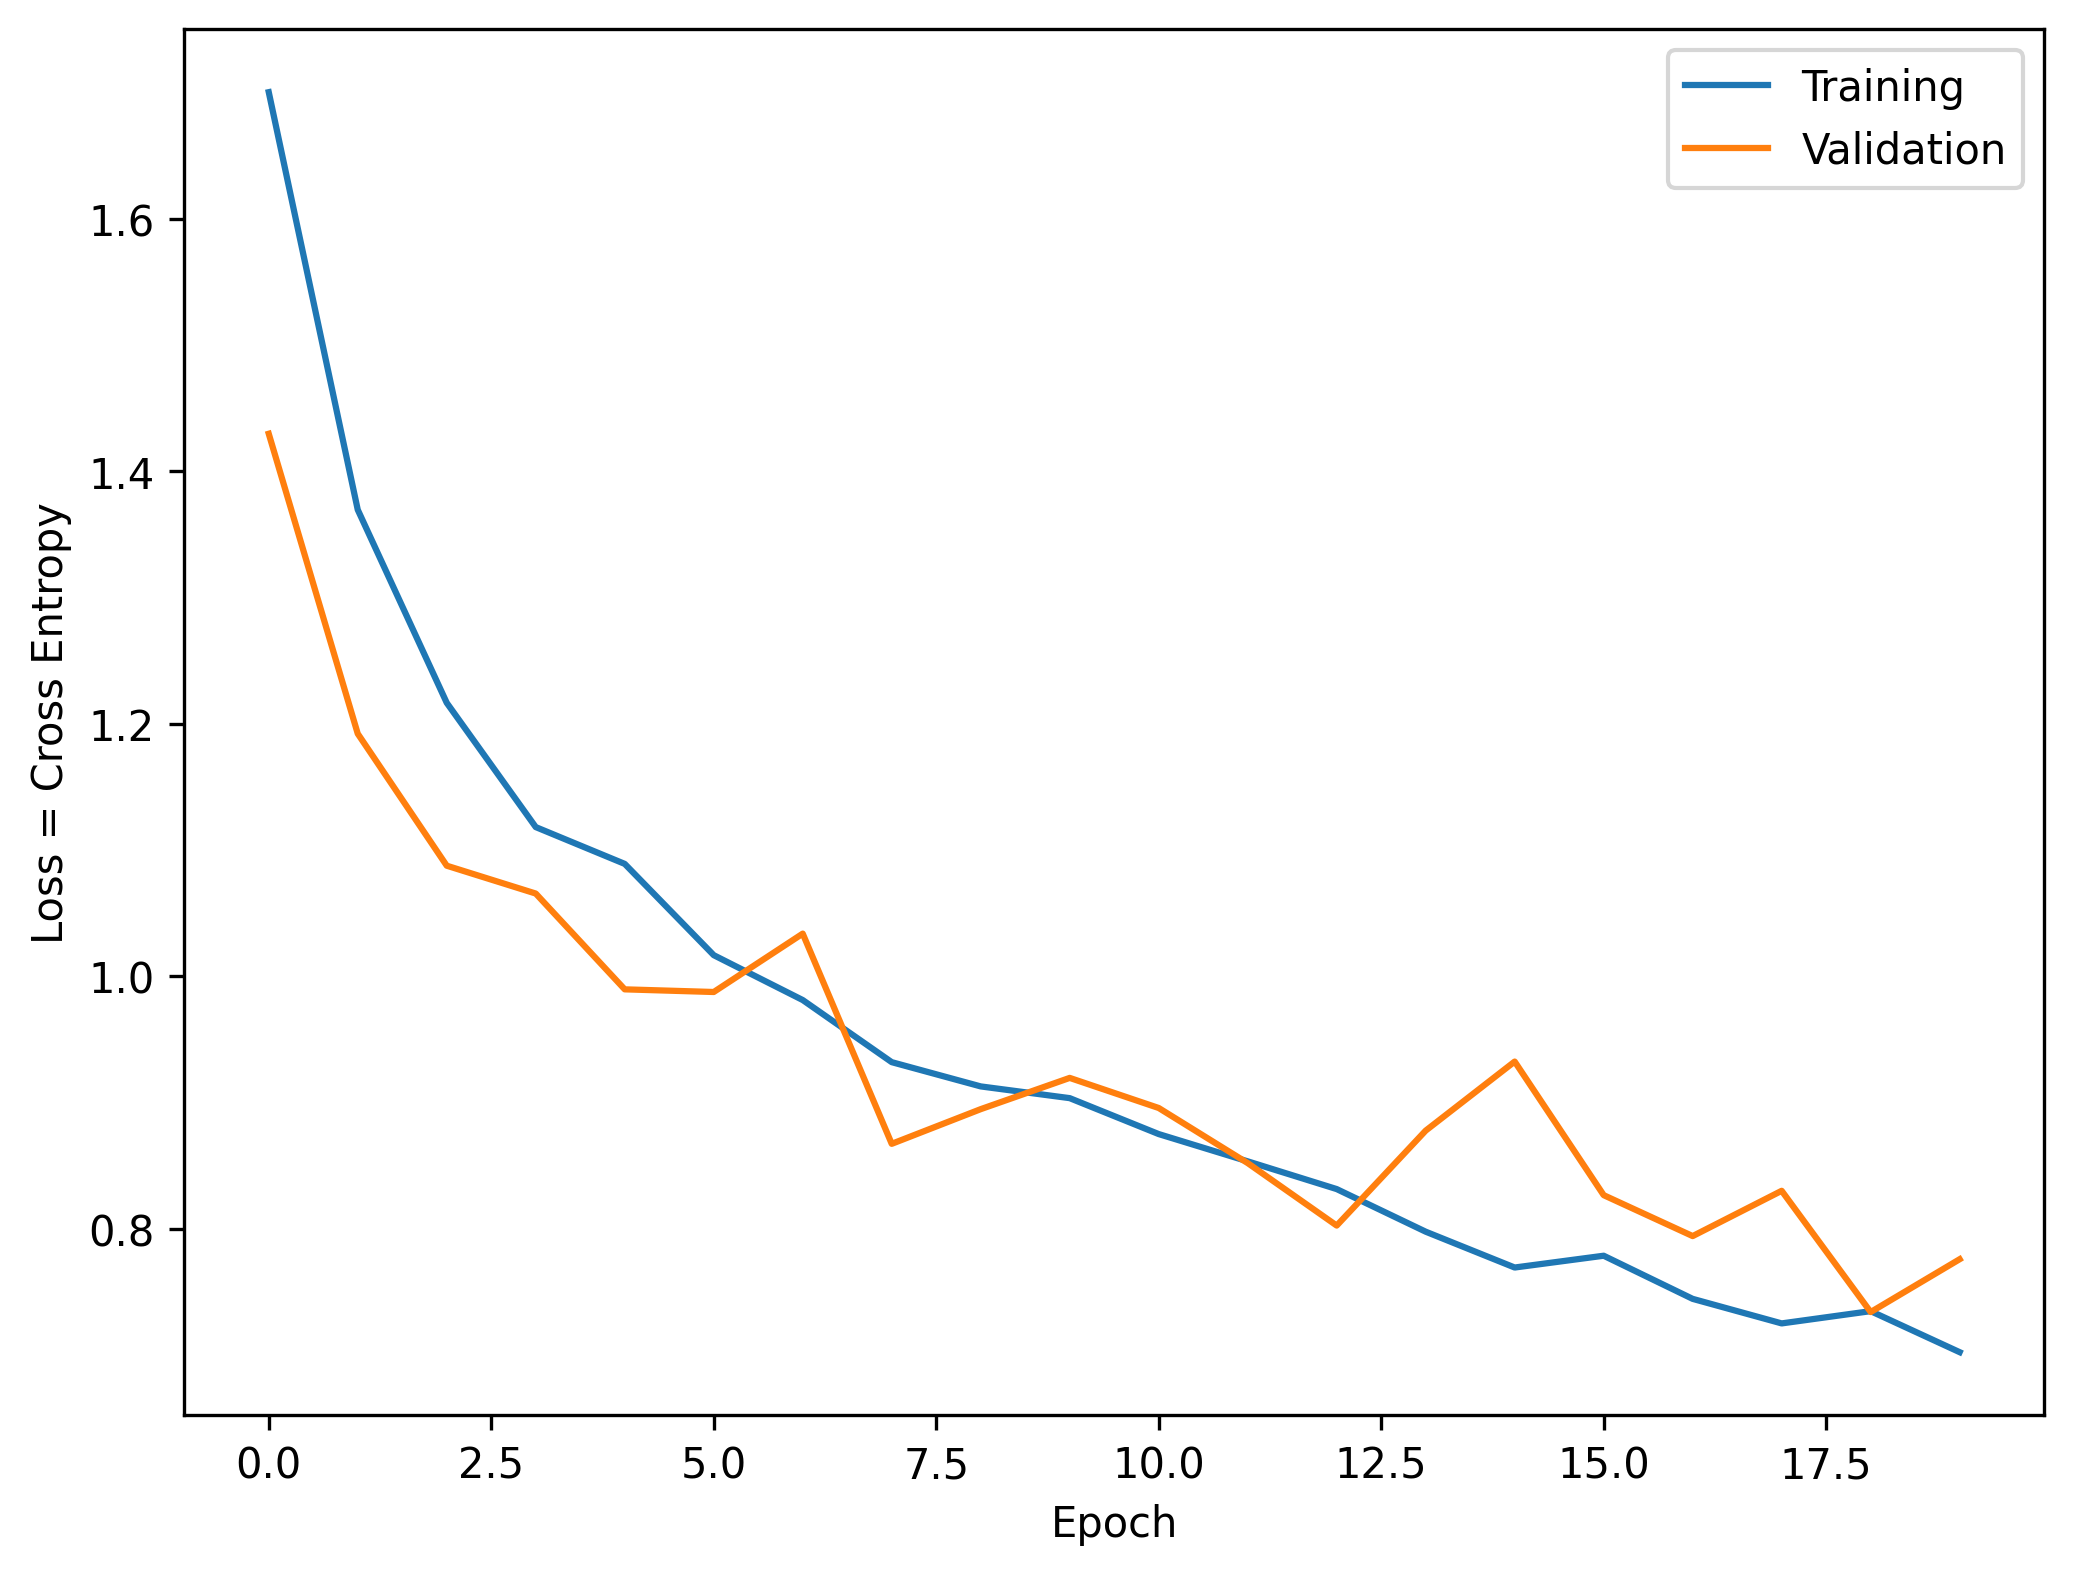

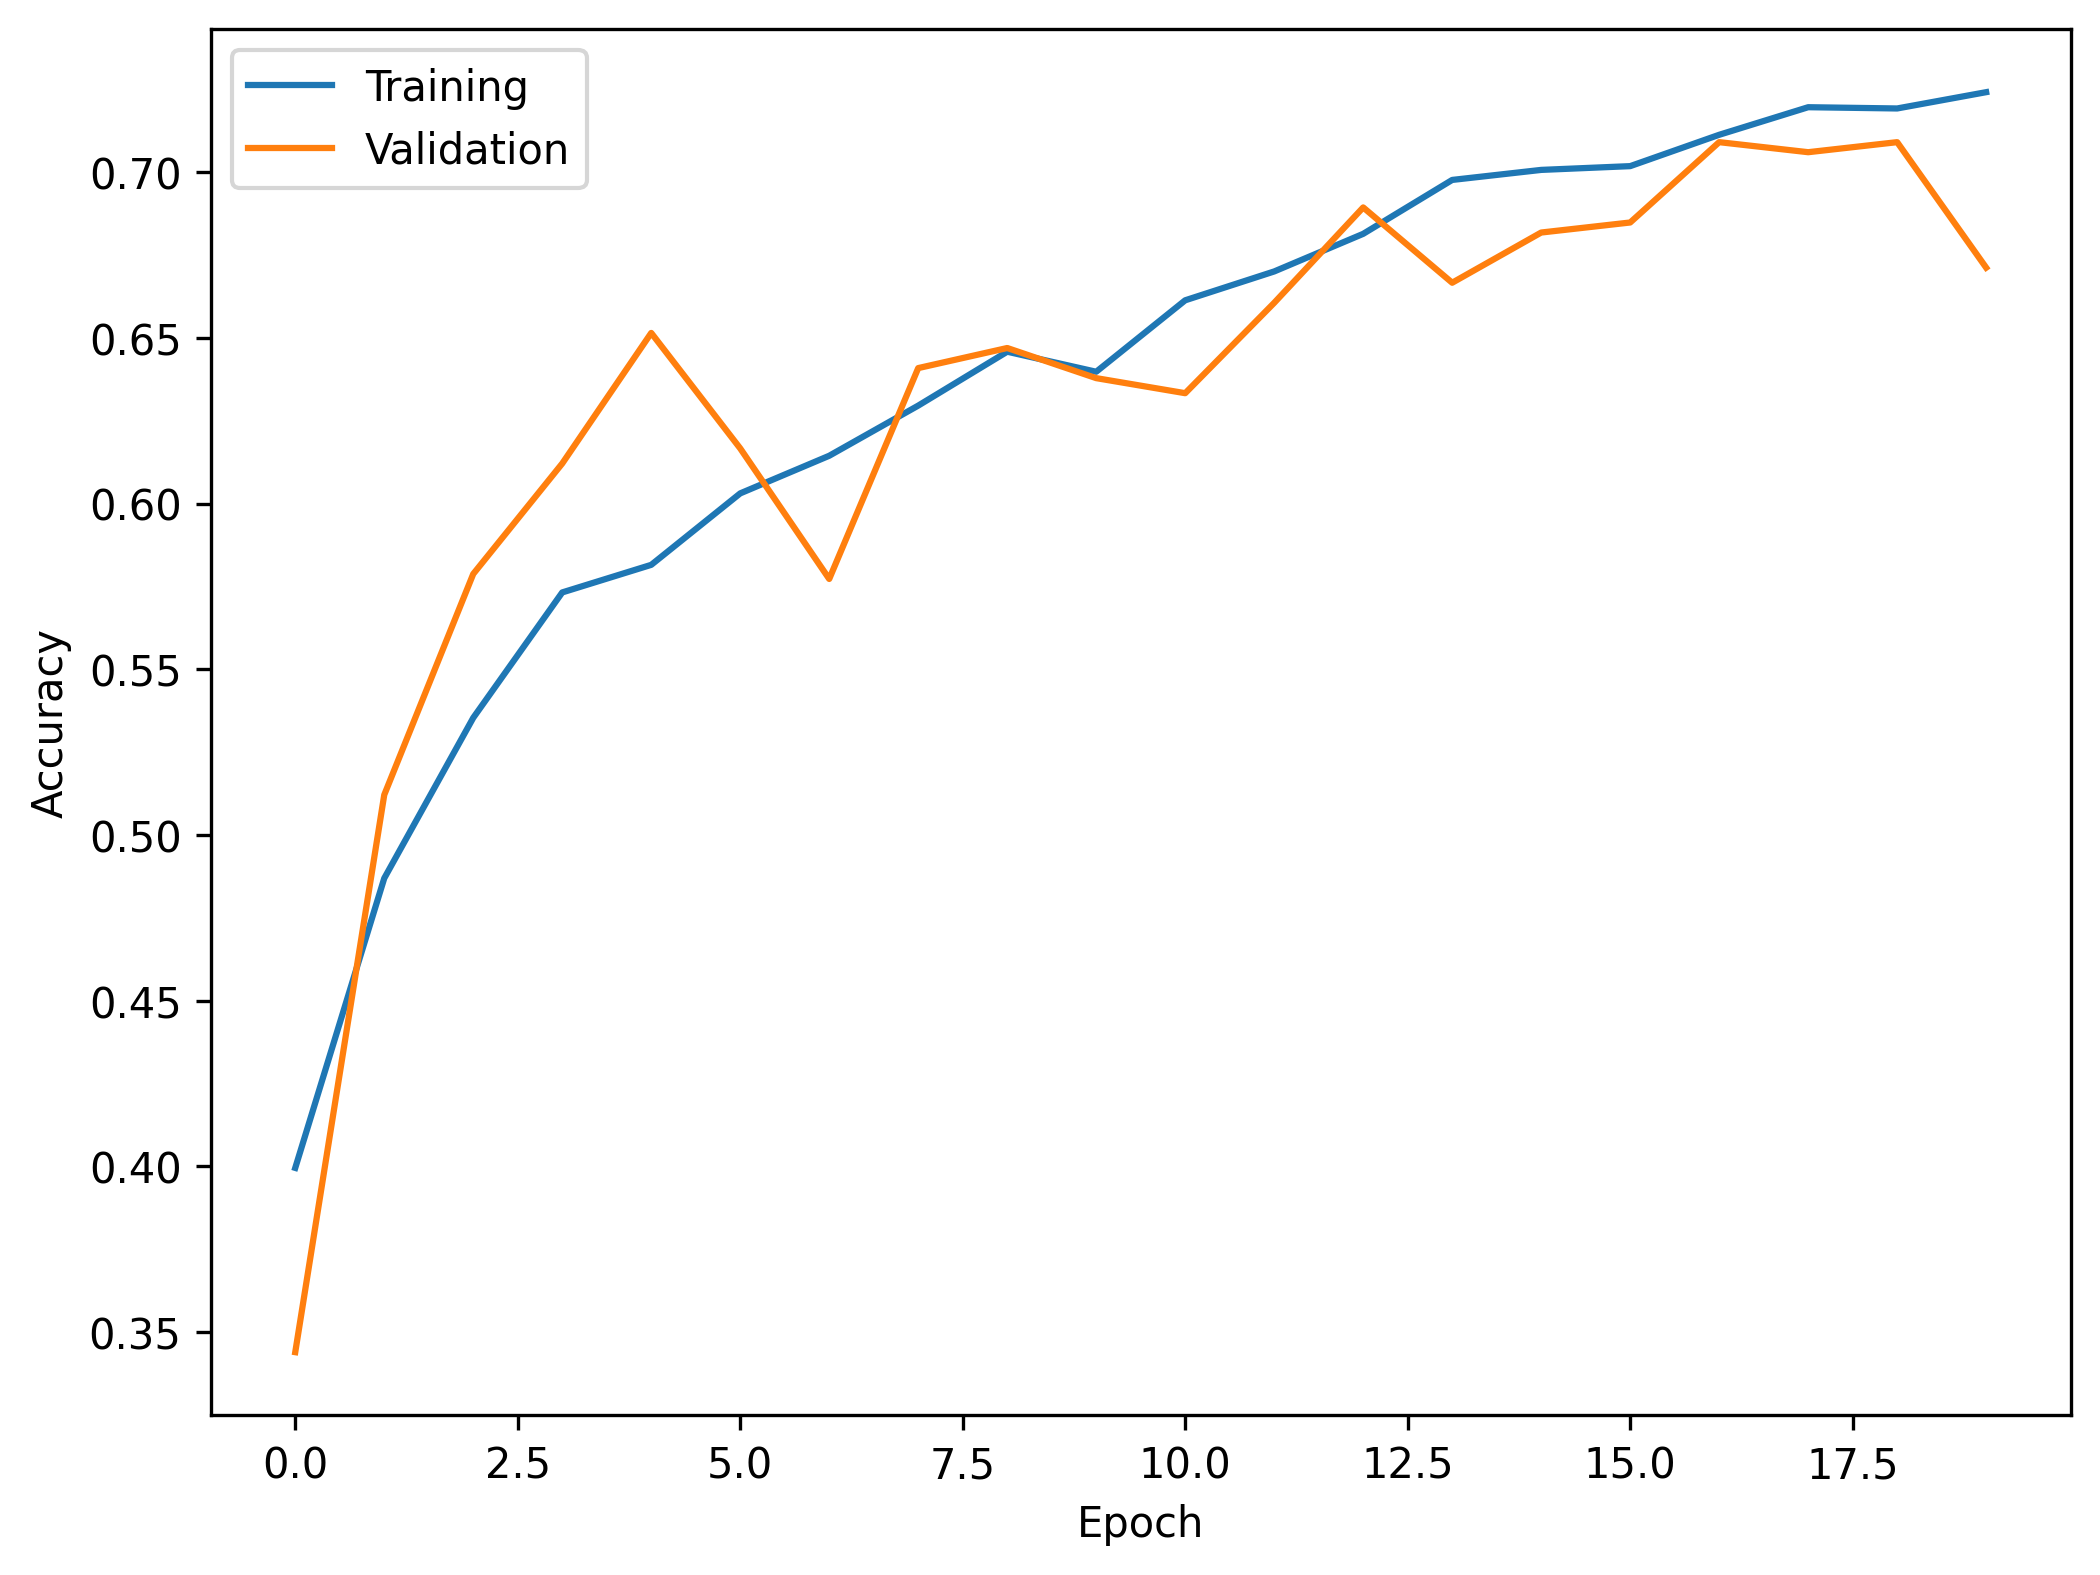

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 1s 67ms/step


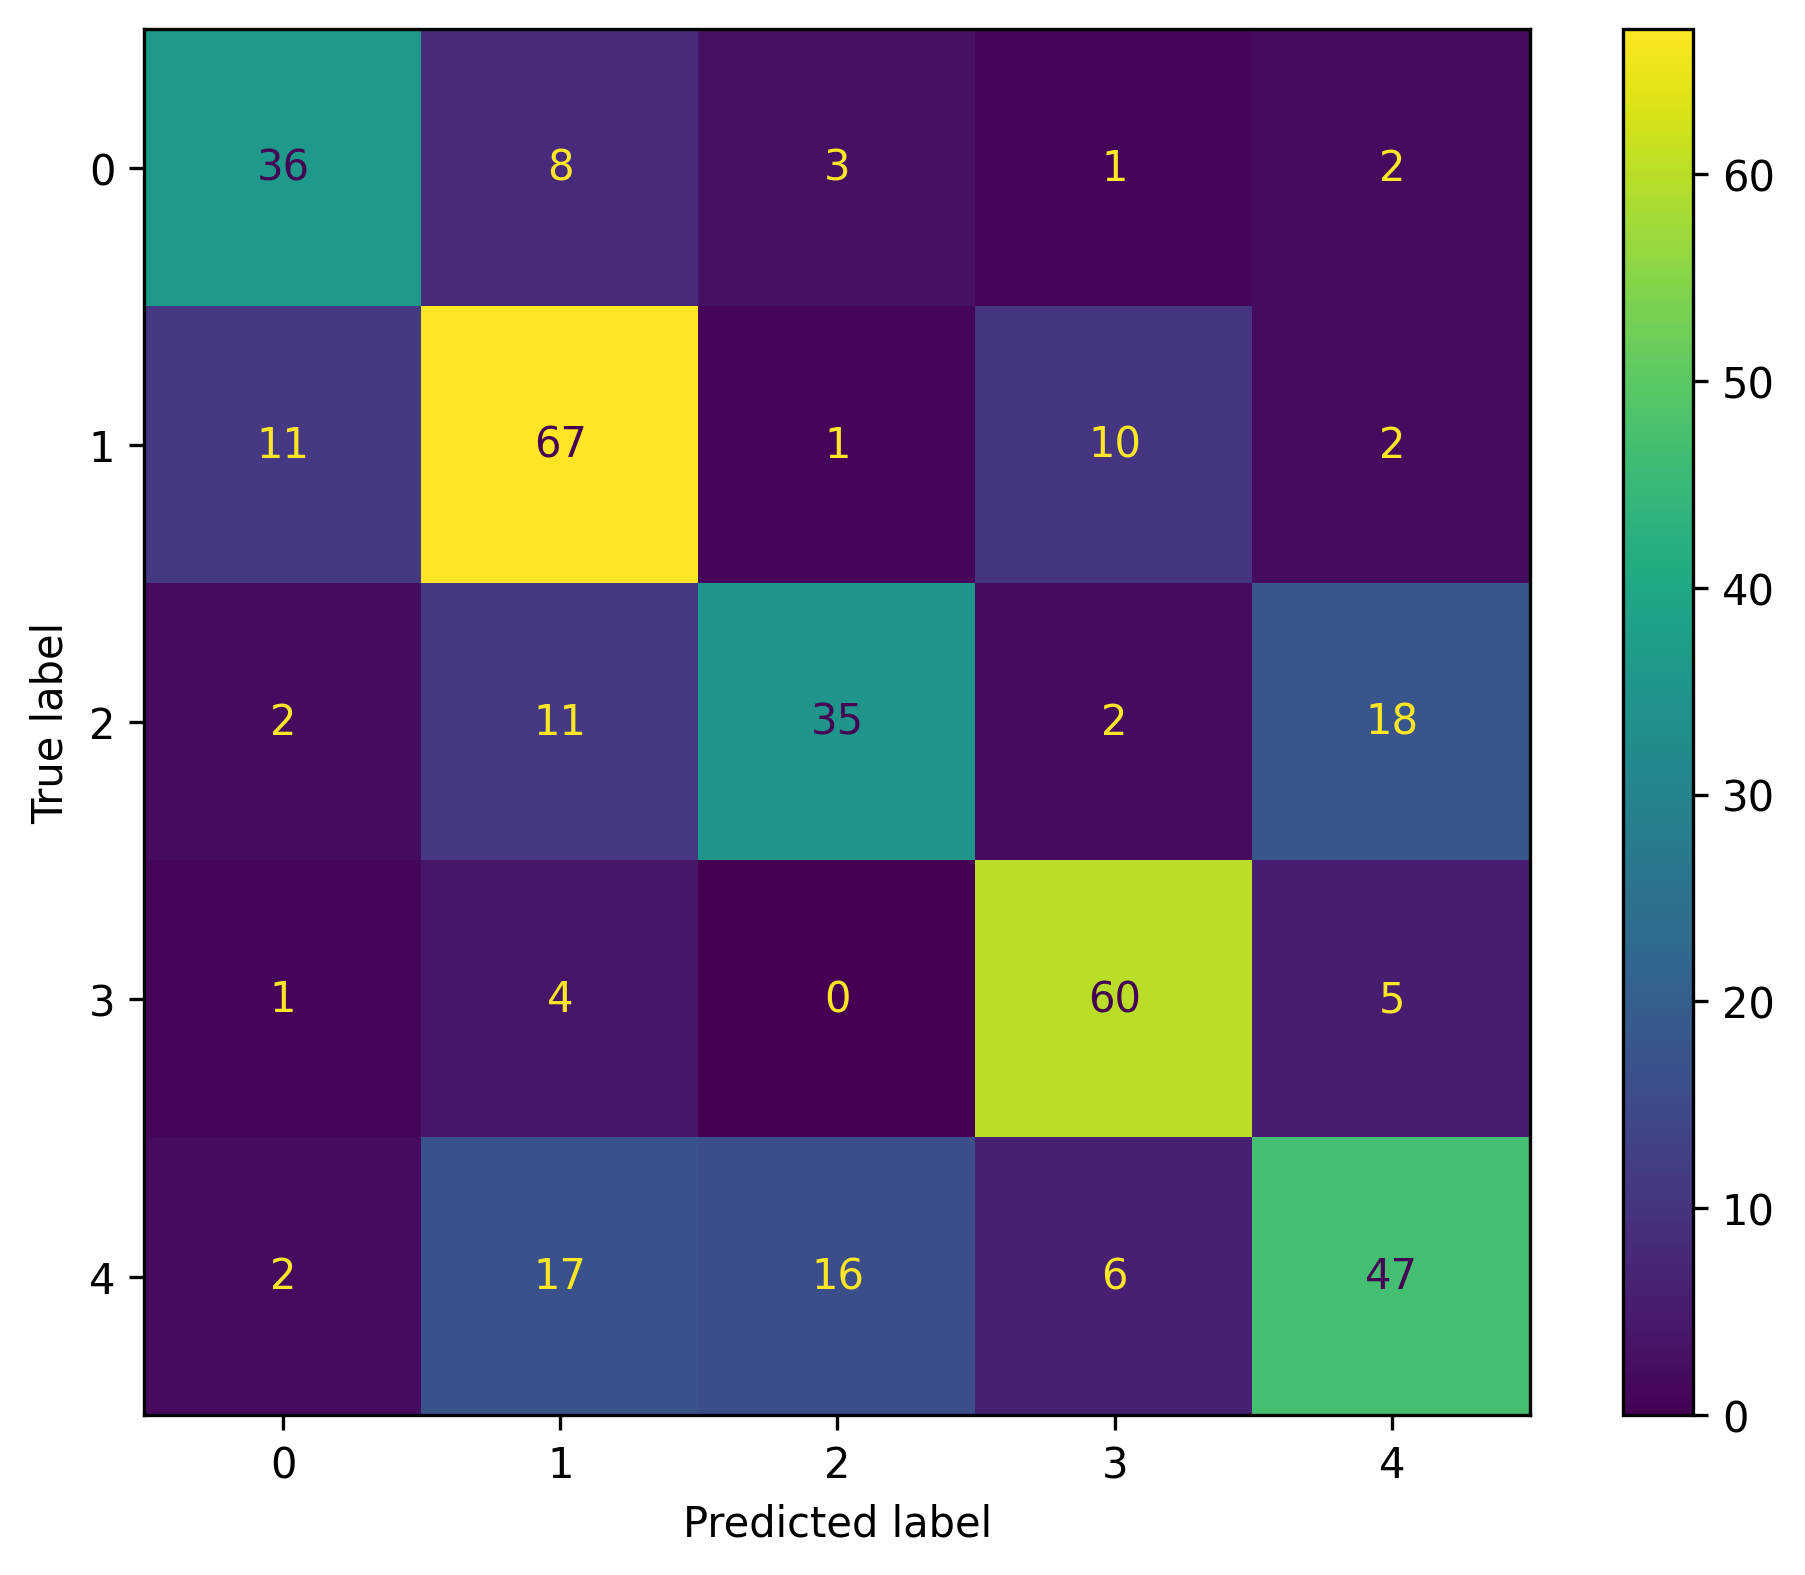

In [13]:
# Create an instance of the Sequential class.
# This will be our model.

model = Sequential()

# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function. We have also set
# the stride length in the horizontal and vertical directions
# to 2, and we have added padding.

model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding = "same", input_shape = (width_npix, height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses average pooling,
# with a pool size of 2x2. We have added padding
# to the pooling layer as well.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Apply Batch normalisation to the pooling layer. In this
# example we have set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.

model.add(BatchNormalization(momentum = 0.9))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. Note that it
# is common to increase the number of filters as we go deeper into
# the network.

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding = "same", activation = 'relu'))

# Add a second average pooling layer.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Apply Batch normalisation to the pooling layer. In this
# example we have set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.

model.add(BatchNormalization(momentum = 0.9))

# Add a third convolutional layer, now with 128 filters.

model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (2, 2), padding = "same", activation = 'relu'))

# Add a third average pooling layer.

model.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))

# Apply Batch normalisation to the pooling layer. In this
# example we have set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.

model.add(BatchNormalization(momentum = 0.9))

# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.

model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.

model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.

model.add(Dropout(0.5))

# The output layer needs 10 units, corresponding
# to the 10 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 10 class labels.

model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.

model.summary()

# Create an instance of the Adam class,
# and set the learning rate.

adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem,
# we are going to use the categorical cross entropy for the
# loss function, and we will use the accuracy for metrics.

model.compile(adam_optimizer, loss='categorical_crossentropy', metrics='accuracy')

# Define the batch size

batch_size = 128

# Fit the model, and record the history of the fit.
# In this example we will train the model for 20
# epochs.

history = model.fit(train_datagen.flow(X_train_norm, 
                                       y_train_cat, 
                                       batch_size = batch_size, 
                                       subset = "training"), 
                    epochs = 20, 
                    validation_data = train_datagen.flow(X_train_norm, 
                                                         y_train_cat, batch_size = batch_size, 
                                                         subset = "validation"))
# Create a pandas dataframe containing
# the history of the fitting

history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.

plt.legend()

# Label both axes.

plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Show the plot.

plt.show()

# Plot the training and validation accuracy
# versus epoch.

plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.

plt.legend()

# Label both axes.

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Show the plot.

plt.show()

# Before we plot the confusion matrix, we need
# to find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label

display_labels = ["%d" % (i, ) for i in range(5)]

# Numerical index of each label

numerical_labels = [i for i in range(5)]

# Lets check the label strings and the
# numerical labels to make sure they line up.

print(display_labels)
print(numerical_labels)

# Use the trained model to predict output
# classes in the test set

y_pred = model.predict(X_test_norm)

# Select the highest probablility class

y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix

con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

In [14]:
# Import the classification_report function from sklearn.

from sklearn.metrics import classification_report

# Print the classification report, using the predicted class
# labels for the testing set obtained from the final model.

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        50
           1       0.63      0.74      0.68        91
           2       0.64      0.51      0.57        68
           3       0.76      0.86      0.81        70
           4       0.64      0.53      0.58        88

    accuracy                           0.67       367
   macro avg       0.67      0.67      0.67       367
weighted avg       0.66      0.67      0.66       367

